In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [3]:

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [5]:

df=pd.read_csv('/content/Studente_Happiness_Prediction.csv')

In [6]:

df.head()

,Age,Gender,Occupation,Relationship Status,Education Level,Physical Health?,Satisfied with Physical Fitness?,Close to others,Mental Health,Illnesses or Disabilities,...,Where do you think you could make changes to increase your happiness levels?,Social Support Network,How often do you feel happy in a typical week?,How satisfied are you with your current job or occupation?,Achievement of Personal Goals,Self-esteem and Self-confidence,Tpical social style?,During which year do you feel you experienced the highest level of Happiness?,During which year do you feel you experienced the most difficult times or lowest Emotional State?,How happy do you usually consider yourself?
0,18-24,Male,Student,Broken,Bachelor's degree,Good,Very Satisfied,Occasionally,Good,No,...,Spend more time with loved ones,Neutral,Occasionally,Not Satisfied at all,"No, I have not achieved my personal goals yet",High,Extroverted,2019.0,2023,Moderately happy
1,25-36,Prefer not to say,Student,Complicated,Less than high school,Poor,Very Satisfied,Most of the time,Excellent,Yes,...,Get enough sleep,Strongly disagree,Occasionally,Slightly Satisfied,"Yes, I have achieved most of my personal goals",High,Ambivert (both extroverted and introverted ten...,2023.0,2021,Very Happy
2,18-24,Female,Student,Broken,Bachelor's degree,Fair,Slightly Satisfied,Most of the time,Fair,Maybe,...,No Overthinking,Neutral,Occasionally,Slightly Satisfied,"No, I have not achieved my personal goals yet",Moderate,Ambivert (both extroverted and introverted ten...,2016.0,2023,Moderately happy
3,18-24,Male,Student,In a realtionship,High school diploma/GED,Good,Moderately Satisfied,Most of the time,Excellent,No,...,Stay positive and optimistic,Strongly agree,Rarely or Never,Slightly Satisfied,"No, I have not achieved my personal goals yet",High,Ambivert (both extroverted and introverted ten...,2020.0,2021,Very Happy
4,18-24,Male,Student,Single,Bachelor's degree,Fair,Slightly Satisfied,Most of the time,Fair,Maybe,...,Stay positive and optimistic,Neutral,Occasionally,Moderately Satisfied,"No, I have not achieved my personal goals yet",High,Ambivert (both extroverted and introverted ten...,2021.0,2018,Moderately happy


In [7]:

df.shape

(985, 23)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 23 columns):
 #   Column                                                                                             Non-Null Count  Dtype  
---  ------                                                                                             --------------  -----  
 0   Age                                                                                                985 non-null    object 
 1   Gender                                                                                             985 non-null    object 
 2   Occupation                                                                                         985 non-null    object 
 3   Relationship Status                                                                                985 non-null    object 
 4   Education Level                                                                                    985 non-null    object 

In [18]:
df.rename(columns={
    "Age": "age",
    "Gender": "gender",
    "Occupation": "occupation",
    "Relationship Status": "relationship_status",
    "Education Level": "education_level",
    "Physical Health?": "physical_health",
    "Satisfied with Physical Fitness?": "fitness_satisfaction",
    "Close to others": "close_to_others",
    "Mental Health": "mental_health",
    "Illnesses or Disabilities": "illness_or_disability",
    "Relationships with Family Members": "family_relationships",
    "Relationships with Friends": "friend_relationships",
    "What part of your life do you think could bring you more joy and satisfaction?": "life_joy_area",
    "Where do you think you could make changes to increase your happiness levels?": "happiness_change_area",
    "Social Support Network": "social_support",
    "How often do you feel happy in a typical week?": "weekly_happiness_freq",
    "How satisfied are you with your current job or occupation?": "job_satisfaction",
    "Achievement of Personal Goals": "personal_goal_achievement",
    "Self-esteem and Self-confidence": "self_esteem_confidence",
    "Tpical social style?": "social_style",
    "During which year do you feel you experienced the highest level of Happiness?": "best_happiness_year",
    "During which year do you feel you experienced the most difficult times or lowest Emotional State?": "worst_emotional_year",
    "How happy do you usually consider yourself?": "self_happiness_level"
})

# View renamed columns
print(df.columns)



Index(['age', 'gender', 'occupation', 'relationship_status', 'education_level',
       'physical_health', 'fitness_satisfaction', 'close_to_others',
       'mental_health', 'illness_or_disability', 'family_relationships',
       'friend_relationships', 'life_joy_area', 'happiness_change_area',
       'social_support', 'weekly_happiness_freq', 'job_satisfaction',
       'personal_goal_achievement', 'self_esteem_confidence', 'social_style',
       'best_happiness_year', 'worst_emotional_year', 'self_happiness_level'],
      dtype='object')


# check isnull

In [19]:

df.isnull().sum()

,0
age,0
gender,0
occupation,0
relationship_status,0
education_level,0
physical_health,0
fitness_satisfaction,0
close_to_others,0
mental_health,0
illness_or_disability,0


# Calculate mode for each column individually

In [24]:
import math

# Calculate mode for each column individually
mode_happiness_change = df['happiness_change_area'].mode()[0]
mode_job = df['job_satisfaction'].mode()[0]
mode_self_esteem = df['self_esteem_confidence'].mode()[0] # This will be a float
mode_best_happiness_year = df['best_happiness_year'].mode()[0]

# Fill NaN values with their respective modes
df['happiness_change_area']=df['happiness_change_area'].fillna(mode_happiness_change)
df['job_satisfaction']=df['job_satisfaction'].fillna(mode_job)
df['self_esteem_confidence']=df['self_esteem_confidence'].fillna(mode_self_esteem)
df['best_happiness_year']=df['best_happiness_year'].fillna(mode_best_happiness_year)

In [28]:
df.isnull().sum()

,0
age,0
gender,0
occupation,0
relationship_status,0
education_level,0
physical_health,0
fitness_satisfaction,0
close_to_others,0
mental_health,0
illness_or_disability,0


# heatmap

<Axes: >

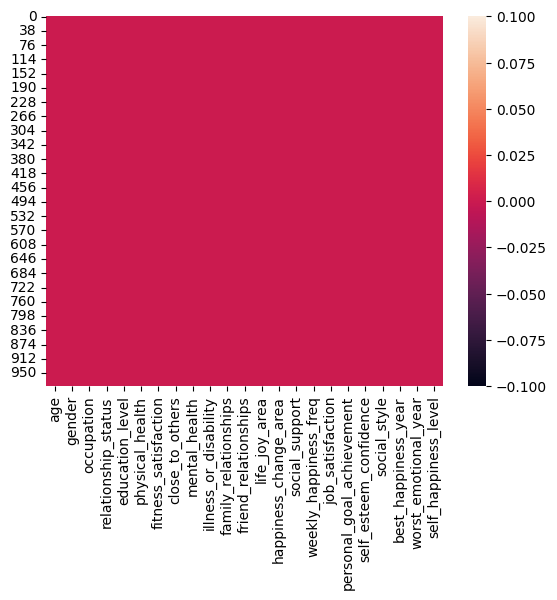

In [26]:
sns.heatmap(df.isnull())

# box plot

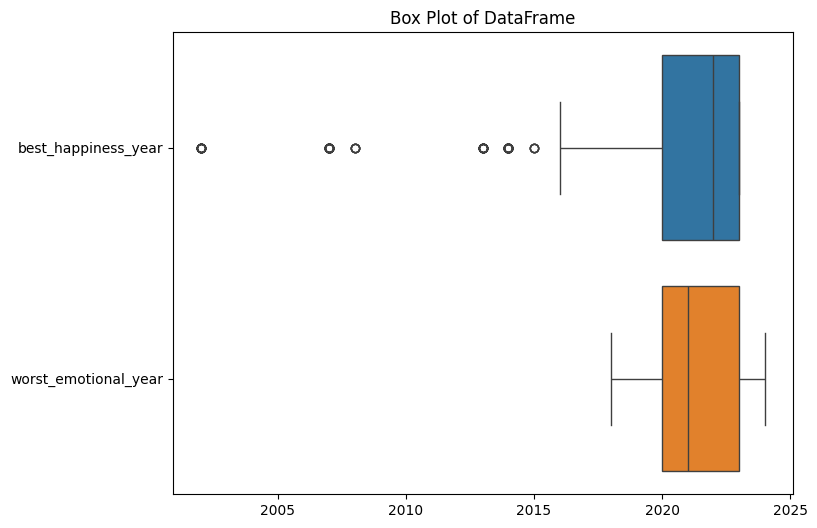

In [27]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, orient='h')
plt.title("Box Plot of DataFrame")
plt.show()

# summary of numarical colums

In [ ]:
import pandas as pd
#summary of numarical colums
print(df.describe())

#sumart if catagorical colums
print(df.describe(include=['object']))

       happiest_year  hardest_year
count     985.000000    985.000000
mean     2019.944162   2021.308629
std         4.540684      1.463713
min      2002.000000   2018.000000
25%      2020.000000   2020.000000
50%      2022.000000   2021.000000
75%      2023.000000   2023.000000
max      2023.000000   2024.000000
          age gender occupation relationship_status    education_level  \
count     985    985        985                 985                985   
unique      3      3          5                   5                  5   
top     18-24   Male    Student              Single  Bachelor's degree   
freq      858    508        919                 596                670   

       physical_health physical_fitness_satisfaction closeness_to_others  \
count              985                           985                 985   
unique               5                             5                   5   
top               Good          Moderately Satisfied    Most of the time   
freq      

# Chart of Mental Health Distribution by Gender

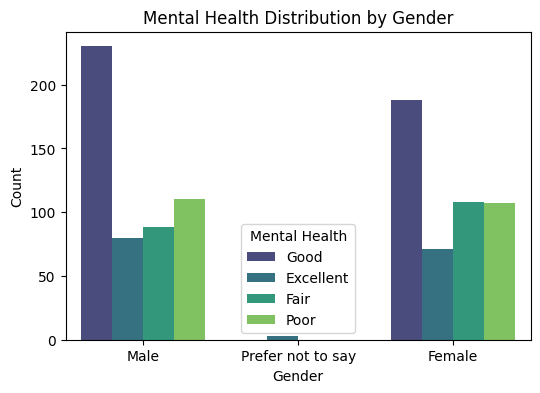

In [29]:
plt.figure(figsize=(6, 4))
sns.countplot(x='gender', hue='mental_health', data=df, palette='viridis')
plt.title("Mental Health Distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Mental Health")
plt.show()

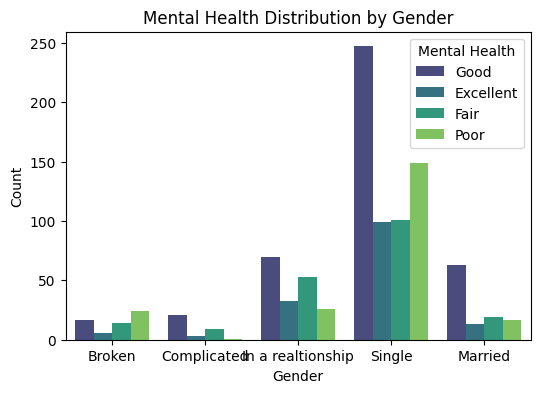

In [30]:
plt.figure(figsize=(6, 4))
sns.countplot(x='relationship_status', hue='mental_health', data=df, palette='viridis')
plt.title("Mental Health Distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Mental Health")
plt.show()

In [31]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = df.select_dtypes(include=['object']).columns

le = LabelEncoder()

for col in categorical_cols:
    df[col] = df[col].astype(str) # Ensure all values are strings before encoding
    df[col] = le.fit_transform(df[col])

print("DataFrame after Label Encoding:")
display(df.head())

DataFrame after Label Encoding:


,age,gender,occupation,relationship_status,education_level,physical_health,fitness_satisfaction,close_to_others,mental_health,illness_or_disability,...,happiness_change_area,social_support,weekly_happiness_freq,job_satisfaction,personal_goal_achievement,self_esteem_confidence,social_style,best_happiness_year,worst_emotional_year,self_happiness_level
0,0,1,3,0,0,2,4,3,2,1,...,6,2,3,2,0,0,2,2019.0,2023,0
1,1,2,3,1,3,3,4,2,0,2,...,3,4,3,3,1,0,1,2023.0,2021,3
2,0,0,3,0,0,1,3,2,1,0,...,5,2,3,3,0,2,1,2016.0,2023,0
3,0,1,3,2,2,2,1,2,0,1,...,8,3,4,3,0,0,1,2020.0,2021,3
4,0,1,3,4,0,1,3,2,1,0,...,8,2,3,1,0,0,1,2021.0,2018,0


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        985 non-null    int64  
 1   gender                     985 non-null    int64  
 2   occupation                 985 non-null    int64  
 3   relationship_status        985 non-null    int64  
 4   education_level            985 non-null    int64  
 5   physical_health            985 non-null    int64  
 6   fitness_satisfaction       985 non-null    int64  
 7   close_to_others            985 non-null    int64  
 8   mental_health              985 non-null    int64  
 9   illness_or_disability      985 non-null    int64  
 10  family_relationships       985 non-null    int64  
 11  friend_relationships       985 non-null    int64  
 12  life_joy_area              985 non-null    int64  
 13  happiness_change_area      985 non-null    int64  

# Correlation of dataset

In [33]:
df.corr()

,age,gender,occupation,relationship_status,education_level,physical_health,fitness_satisfaction,close_to_others,mental_health,illness_or_disability,...,happiness_change_area,social_support,weekly_happiness_freq,job_satisfaction,personal_goal_achievement,self_esteem_confidence,social_style,best_happiness_year,worst_emotional_year,self_happiness_level
age,1.000000,0.033013,-0.052476,-0.117125,0.372877,-0.084588,0.100675,0.118409,-0.082945,0.103305,...,0.029904,0.051240,0.161964,-0.012385,-0.118842,-0.058139,-0.056688,-0.148840,0.108633,0.004421
gender,0.033013,1.000000,-0.066045,-0.074934,0.135833,0.065622,0.064932,0.083027,-0.000483,-0.000366,...,-0.106989,-0.029517,0.027501,0.026526,0.026404,-0.125822,0.011368,-0.120480,-0.076364,0.139831
occupation,-0.052476,-0.066045,1.000000,-0.013088,-0.065313,-0.072256,0.081764,0.125214,0.009233,0.014789,...,-0.108891,0.099246,0.103826,0.037683,-0.020281,-0.011587,-0.059223,0.016107,0.132113,0.062140
relationship_status,-0.117125,-0.074934,-0.013088,1.000000,-0.030134,-0.057668,0.056056,0.135083,0.021022,-0.011367,...,-0.108652,-0.109626,-0.046791,0.023398,-0.032753,0.042064,0.090103,0.166389,0.042354,0.044464
education_level,0.372877,0.135833,-0.065313,-0.030134,1.000000,0.037023,0.040465,-0.029870,-0.125405,-0.061066,...,-0.017919,-0.019478,0.009948,-0.067016,-0.218142,-0.020070,-0.028687,-0.083431,-0.009552,0.041486
physical_health,-0.084588,0.065622,-0.072256,-0.057668,0.037023,1.000000,-0.032900,-0.098464,0.151454,-0.094838,...,-0.026510,0.072933,-0.029171,0.077608,0.037864,0.033333,0.068249,-0.072290,-0.004744,0.046502
fitness_satisfaction,0.100675,0.064932,0.081764,0.056056,0.040465,-0.032900,1.000000,0.129160,-0.014830,0.133221,...,-0.033606,0.135157,0.212037,0.196122,-0.076018,-0.088454,0.120360,0.073583,-0.000653,0.135430
close_to_others,0.118409,0.083027,0.125214,0.135083,-0.029870,-0.098464,0.129160,1.000000,0.162849,0.043691,...,-0.091116,0.100792,0.348871,-0.097556,-0.006546,0.039231,0.001741,-0.048309,0.049765,0.067232
mental_health,-0.082945,-0.000483,0.009233,0.021022,-0.125405,0.151454,-0.014830,0.162849,1.000000,0.028512,...,0.073594,0.041761,0.130996,-0.167858,-0.173651,0.133637,-0.046603,-0.200715,0.021659,-0.088518
illness_or_disability,0.103305,-0.000366,0.014789,-0.011367,-0.061066,-0.094838,0.133221,0.043691,0.028512,1.000000,...,0.024253,0.069960,0.183754,0.172083,-0.038577,-0.066903,0.129212,-0.032421,0.069755,0.133973


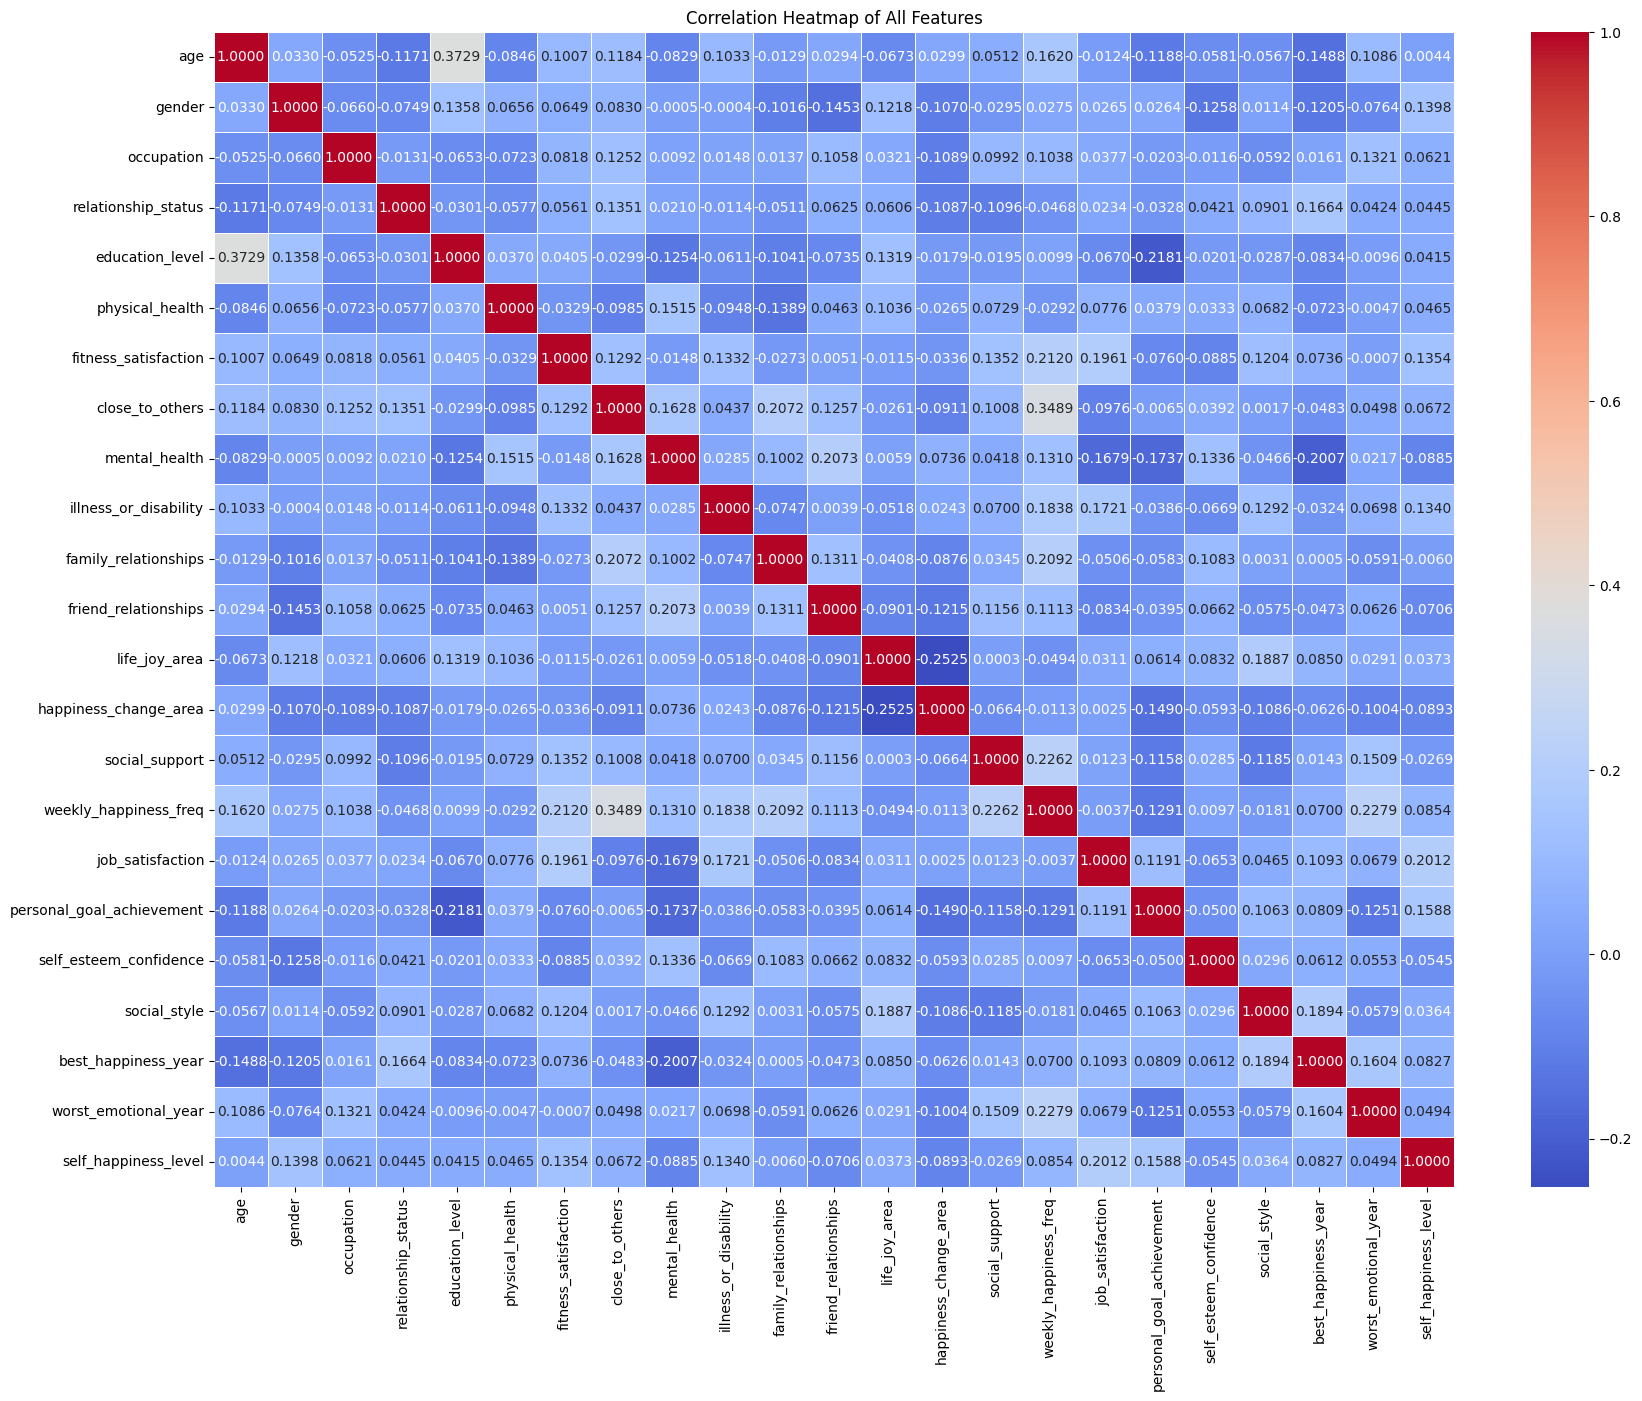

In [35]:
plt.figure(figsize=(20, 15))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.4f', linewidths=.5)
plt.title('Correlation Heatmap of All Features')
plt.show()